# OTUS Ablation Study Paper Plots | $p p > Z > e^+ e^-$

This notebook creates the plots which are found in the paper: https://arxiv.org/abs/2101.08944. 

# Load Required Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.cm as cm
from scipy import stats

# Add utilityFunctions/ to easily use utility .py files
import sys
sys.path.append("../../utilityFunctions")

# Meta Parameters

In [2]:
#-- Set appropriate beta value --#
# allBetas    = [0, 10, 20, 50, 100, 200]
selectBetas = [0, 50, 100]
beta = selectBetas[0]
print('beta = ', beta)

beta =  0


In [3]:
save_figs = True  # Global switch to turn on saving figures to files
N_slices  = 1000  # Global number of slices to calculate SW distance with

data_directory    = '../../data/'
dataset_name      = 'ppzee'
results_dataPath  = '../../experiments/'+dataset_name+f'/ablationStudy/anchor_tuning/npzFiles/swae-beta={beta}.npz'
img_dir           = dataset_name+'_anchorTuningImages/'

np.random.seed(4) # Set numpy random seed

# Get Truth Datasets and Model Results

The data was split into training, validation, and two testing sets. We load only the validation datasets here and split them in two. We also load in the model results calculated on one of the testing datasets.  

Note that we have two separate validation sets to ensure the independence of samples when performing statistical tests.

Specifically, we have 4 initial datasets: x_val1, z_val1, x_val2, and z_val2.

Validation set 1 has been used to obtain network results. These results will be compared to the independent validation set 2.

For testing the encoder's performance we will use the following convention:
- z_pred_val1 = E(x_val1, $\epsilon$)

In plots this will be denoted as $x \rightarrow \tilde{z}$.

For testing the decoder's performance we will use the following convention:
- x_pred_truth_val1 = D(z_val1, $\epsilon$)

In plots this will be denoted as $z \rightarrow \tilde{x}'$.

For testing the overall performance of the full encoder-decoder chain we will use the following convention:
- x_pred_val1 = D(E(x_val1, $\epsilon$), $\epsilon$)

In plots this will be denoted as $x \rightarrow \tilde{z} \rightarrow \tilde{x}$.

Note that $\epsilon$ denotes the random noise input of the networks. Note that all $\epsilon$ are different random samples. This happens internally and thus won't be shown in what follows.

## Load in Validation Data and Results

In [4]:
valData = np.load(results_dataPath)

#-- Load truth data --#
zData = valData['z']
xData = valData['x']

#-- Load results data --#
zPred      = valData['x_encoded']        # E(x)
xPred      = valData['x_reconstructed']  # D(E(x))
xPredTruth = valData['z_decoded']        # D(z)

#-- Split data into the two separate validation sets --#
f = int(0.5*zData.shape[0])

x_val1  = xData[0:f]
z_val1  = zData[0:f]

x_val2  = xData[f:]
z_val2  = zData[f:]

#-- Make sure validation sets have the same number of events --#
assert(x_val1.shape[0] == x_val2.shape[0])
assert(z_val1.shape[0] == z_val2.shape[0])
print('z_val1 Shape, x_val1 Shape: ', z_val1.shape, x_val1.shape)
print('z_val2 Shape, x_val2 Shape: ', z_val2.shape, x_val2.shape)

#-- Get predicted z for x_val1, E(x_val1) --#
z_pred_val1 = zPred[0:f]

#-- Get predicted x for full autoencoder chain, D(E(x_val1)) --#
x_pred_val1 = xPred[0:f]

#-- Get predicted x for true z_val1, D(z_val1) --#
x_pred_truth_val1 = xPredTruth[0:f]   

z_val1 Shape, x_val1 Shape:  (20000, 8) (20000, 8)
z_val2 Shape, x_val2 Shape:  (20000, 8) (20000, 8)


# Define Statistical Tests That We Will Use

For each one-dimensional distribution we will perform the following statistical tests:

- $\chi^2$
- 2-sample, 2-sided Kolmogorov-Smirov test

We will also report the 1D Wasserstein distance.

z-space plots will compare
- z_val2 with z_pred_val1 

In plots this will be denoted as $z$ vs $\tilde{z}$. 

x-space plots will compare
- x_val2 with x_pred_val1 

In plots this will be denoted as $x$ vs $\tilde{x}$. 
- x_val2 with x_pred_truth_val1 

In plots this will be denoted as $x$ vs $\tilde{x}'$.


## Import statistical test functions

In [5]:
from func_utils import runStatAnalysis
from func_utils import sliced_wd_numpy as avSWDistance
# ReducedChiSq(), W1Dist() #?, KSTest(), runStatAnalysis(), generateTheta() #?, avSWDistance() #?

## Calculate SW Distance Results (Global Metric) Over N_Slices

### z-space results

In [6]:
print(r"SW distance $z$ vs $\tilde{z}$: ", avSWDistance(z_val2, z_pred_val1, N_slices))

SW distance $z$ vs $\tilde{z}$:  1.6031508775188317


### x-space results

In [7]:
print(r"SW distance $x$ vs $\tilde{x}$: ", avSWDistance(x_val2, x_pred_val1, N_slices))
print(r"SW distance $x$ vs $\tilde{x}^\prime$: ", avSWDistance(x_val2, x_pred_truth_val1, N_slices))

SW distance $x$ vs $\tilde{x}$:  1.4075965761365168
SW distance $x$ vs $\tilde{x}^\prime$:  2.30405231784531


# Create Transport Plots

In [8]:
from plot_utils import transportPlot

## Decoder $\tilde{z} \rightarrow \tilde{x}$

### Positron $p_x$

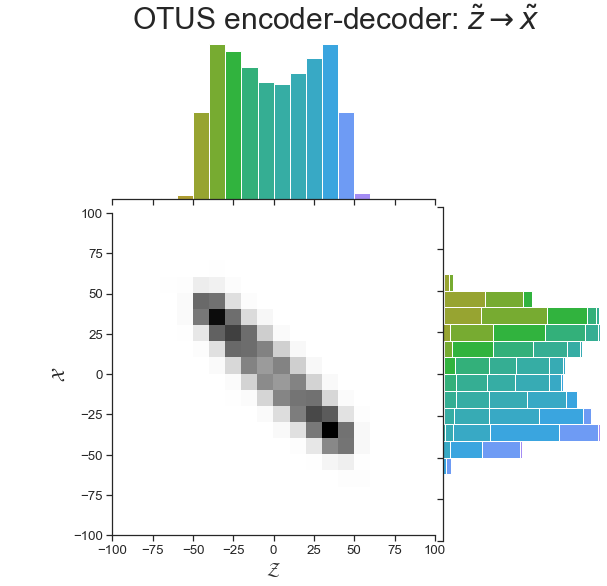

In [9]:
#-- Make decoder transport plot from learned latent space--#

# Positron px
Z = z_pred_val1[:,4].reshape(-1,1)
X = x_pred_val1[:,4].reshape(-1,1)

n = Z.shape[1]
ZX = [np.concatenate((Z[:,i].reshape(-1,1), X[:,i].reshape(-1,1)), axis=1) for i in range(n)]

transportPlot(ZX[0], zlim=(-100,100), xlim=(-100,100), nz=20, nx=20, name=f'decTransport_zpred_xpred_val_positronpx_beta={beta}.png', dec=True, title=r'$\hspace{4}$ OTUS encoder-decoder: $\tilde{z} \rightarrow \tilde{x}$', save_figs=save_figs, img_dir=img_dir)

### Positron Energy

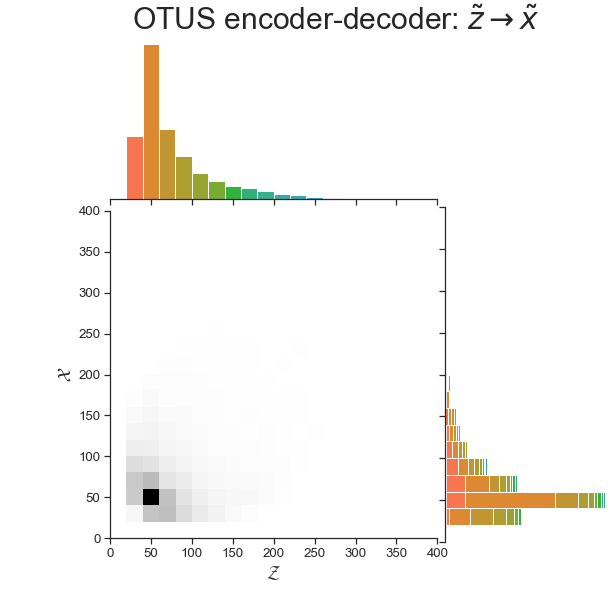

In [10]:
#-- Make decoder transport plot from learned latent space--#

# Positron energy
Z = z_pred_val1[:,7].reshape(-1,1)
X = x_pred_val1[:,7].reshape(-1,1)

n = Z.shape[1]
ZX = [np.concatenate((Z[:,i].reshape(-1,1), X[:,i].reshape(-1,1)), axis=1) for i in range(n)]

transportPlot(ZX[0], zlim=(0,400), xlim=(0,400), nz=20, nx=20, name=f'decTransport_zpred_xpred_val_positronE_beta={beta}.png', dec=True, title=r'$\hspace{4}$ OTUS encoder-decoder: $\tilde{z} \rightarrow \tilde{x}$', save_figs=save_figs, img_dir=img_dir)